In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('corona_tested_006.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_40076\1245587404.py:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('corona_tested_006.csv')


In [3]:
data.head(20)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
5,6,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,other,None,None,Contact with confirmed
6,7,11-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Other
7,8,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,negative,None,None,Abroad
8,9,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
9,10,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad


In [4]:
data.tail(20)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278828,278829,30-04-2020,False,False,False,False,False,negative,None,male,Other
278829,278830,30-04-2020,False,False,False,False,False,negative,None,female,Other
278830,278831,30-04-2020,False,False,False,False,False,negative,None,male,Other
278831,278832,30-04-2020,False,False,False,False,False,negative,None,female,Other
278832,278833,30-04-2020,False,False,False,False,False,negative,None,male,Other
278833,278834,30-04-2020,False,False,False,False,False,negative,None,female,Other
278834,278835,30-04-2020,False,False,False,False,False,negative,None,male,Other
278835,278836,30-04-2020,False,False,False,False,False,negative,None,male,Other
278836,278837,30-04-2020,False,False,False,False,False,positive,None,None,Other
278837,278838,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [5]:
data['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

      NOTE: Here Age_60_above has 127320 values as 'None', which is ambigious. Age can either be <60 or >60. We cannot 
      confirm if the age is exactly 60 either, if we do that, then we should confirm the exact age of every individual.
      Hence, choosing to discard this Column for model evaluation.

In [6]:
data['Sex'].value_counts(normalize=True)*100

female    46.677043
male      46.307307
None       7.015650
Name: Sex, dtype: float64

    Note: The 'Sex' column has about 7% data, which is unknown. Adding 'Sex' as a parameter in Covid - detection might 
    have ethical, cultural and technical implications. Hence choosing not to use this Column for model evaluation. 

In [7]:
data['Known_contact'].value_counts(normalize=True)*100

Other                     87.051368
Abroad                     9.133291
Contact with confirmed     3.815340
Name: Known_contact, dtype: float64

      Note: The 'Known_contact' has 87% data that has 'Other' Label, choosing to discard this column for model evaluation,
      as the data is heavily biased to the 'other' label.

# Data Cleaning

In [8]:
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [9]:
data.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [11]:
data['Test_date'] = pd.to_datetime(data['Test_date'], format='%d-%m-%Y')

## Getting the month from Test_date feature
data['Month'] = data['Test_date'].dt.month

In [12]:
## Uppercasing all the labels.
data = data.apply(lambda x: x.astype(str).str.upper())


In [13]:
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Month
0,1,2020-03-11,TRUE,FALSE,TRUE,FALSE,FALSE,NEGATIVE,NONE,NONE,ABROAD,3
1,2,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,POSITIVE,NONE,NONE,ABROAD,3
2,3,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,POSITIVE,NONE,NONE,ABROAD,3
3,4,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,NEGATIVE,NONE,NONE,ABROAD,3
4,5,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,NEGATIVE,NONE,NONE,CONTACT WITH CONFIRMED,3


In [14]:
data.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Month
278843,278844,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,POSITIVE,NONE,MALE,OTHER,4
278844,278845,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,NEGATIVE,NONE,FEMALE,OTHER,4
278845,278846,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,NEGATIVE,NONE,MALE,OTHER,4
278846,278847,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,NEGATIVE,NONE,MALE,OTHER,4
278847,278848,2020-04-30,FALSE,FALSE,FALSE,FALSE,FALSE,NEGATIVE,NONE,FEMALE,OTHER,4


In [15]:
data = data[data['Corona']!='OTHER']

In [16]:
data['Corona'].value_counts()

NEGATIVE    260227
POSITIVE     14729
Name: Corona, dtype: int64

In [17]:
data= data[data!='NONE']

In [18]:
data['Cough_symptoms'].value_counts()

FALSE    233133
TRUE      41571
Name: Cough_symptoms, dtype: int64

In [19]:
data['Fever'].value_counts()

FALSE    253329
TRUE      21375
Name: Fever, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274956 entries, 0 to 278847
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               274956 non-null  object
 1   Test_date            274956 non-null  object
 2   Cough_symptoms       274704 non-null  object
 3   Fever                274704 non-null  object
 4   Sore_throat          274955 non-null  object
 5   Shortness_of_breath  274955 non-null  object
 6   Headache             274955 non-null  object
 7   Corona               274956 non-null  object
 8   Age_60_above         149292 non-null  object
 9   Sex                  255911 non-null  object
 10  Known_contact        274956 non-null  object
 11  Month                274956 non-null  object
dtypes: object(12)
memory usage: 27.3+ MB


In [21]:
data.shape

(274956, 12)

In [22]:
dt = data.reset_index()

In [23]:
dt = dt.drop(['index'],axis=1)

In [24]:
dt.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Month
0,1,2020-03-11,TRUE,FALSE,TRUE,FALSE,FALSE,NEGATIVE,NaN,NaN,ABROAD,3
1,2,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,POSITIVE,NaN,NaN,ABROAD,3
2,3,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,POSITIVE,NaN,NaN,ABROAD,3
3,4,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,NEGATIVE,NaN,NaN,ABROAD,3
4,5,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,NEGATIVE,NaN,NaN,CONTACT WITH CONFIRMED,3


In [25]:
dt2 = dt.copy()



Removing Unnecessary Columns from dt2. dt2 will be used for further model evaluations and dt will be used for SQL.



In [26]:
dt2 = dt2.drop(['Ind_ID','Test_date','Age_60_above','Sex','Known_contact'],axis=1)

# Categorical Data: Need to convert to Numerical Data
    Using cat.codes for encoding

In [27]:
## Converting all the datatypes to 'Category'
dt2 = dt2.apply(lambda x:x.astype('category'))

In [28]:
## Encoding the categorical data
dt2 = dt2.apply(lambda x:x.cat.codes)

In [29]:
dt2.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Month
0,1,0,1,0,0,0,0
1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [30]:
dt2.tail()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Month
274951,0,0,0,0,0,1,1
274952,0,0,0,0,0,0,1
274953,0,0,0,0,0,0,1
274954,0,0,0,0,0,0,1
274955,0,0,0,0,0,0,1


In [31]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274956 entries, 0 to 274955
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Cough_symptoms       274956 non-null  int8 
 1   Fever                274956 non-null  int8 
 2   Sore_throat          274956 non-null  int8 
 3   Shortness_of_breath  274956 non-null  int8 
 4   Headache             274956 non-null  int8 
 5   Corona               274956 non-null  int8 
 6   Month                274956 non-null  int8 
dtypes: int8(7)
memory usage: 1.8 MB


In [32]:
dt2['Corona'].value_counts()

0    260227
1     14729
Name: Corona, dtype: int64

In [33]:
dt2.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Month                  0
dtype: int64

In [34]:
dt2 = dt2.dropna().reset_index(drop=True)

In [35]:
dt2.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Month                  0
dtype: int64

In [36]:
dt2['Corona'].value_counts(normalize=True)*100
# Since the target feature is unbalanced and has a 95:5 split, choosing to use SMOTE to balance the dataset.

0    94.643143
1     5.356857
Name: Corona, dtype: float64

In [37]:
dt2['Corona'].value_counts()

0    260227
1     14729
Name: Corona, dtype: int64

# Hypothesis:
           
           NULL Hypothesis: There is no correlation between Cough_symptoms, Fever, Sore_throat, Shortness_of_breath and                                     Headache and Month
           
           Alternate Hypothesis: There is a correlation between Cough_symptoms, Fever, Sore_throat, Shortness_of_breath and                                     Headache and Month

# Feature Selection using RFE

In [38]:
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE   ## Using Synthetically Minority Oversampling Technique

In [39]:
X = dt2[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Month']]
y = dt2['Corona']


## Using SMOTE to Take more samples from Lesser Category of Predictor Variable
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

####  Feature Selection with Recursive Feature Elimination

rfe = RFE(estimator=DecisionTreeClassifier(),n_features_to_select=4,step=1)
# fitting the model
rfe.fit(X, y)
selected_features = rfe.get_support()

selected_features = X.columns[selected_features]
selected_features


Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Headache'], dtype='object')

In [40]:
best_features = pd.DataFrame({"Features":X.columns,"Ranking":rfe.ranking_})
best_features

,Features,Ranking
0,Cough_symptoms,1
1,Fever,1
2,Sore_throat,1
3,Shortness_of_breath,2
4,Headache,1
5,Month,3


      From the Table above, it is evident that the best features are 'Cough_symptoms', 'Fever', 'Headache' which is further validated in Random Forest model, by using feature_importances

      With RFE we can see that the selected features are indeed important to the model prediction. Hence we will reject
      the Null Hypothesis because there is a relationship between Cough_symptoms, Fever, Sore_throat,
      Shortness_of_breath and Headache.

# Creating Training and Testing Data

In [41]:
X = dt2[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Month']]
y = dt2['Corona']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=46)
## Splitting the Training and Testing Data to: 80:20, 20% of the data goes into testing

In [43]:
X_train.shape

(416363, 6)

In [44]:
y_train.shape

(416363,)

The number of rows for X and y is same now

# 1. Logistic Regression Model

In [45]:
LG = LogisticRegression().fit(X_train,y_train)

In [46]:
y_pred = LG.predict(X_test)

In [47]:
accuracy_LG = metrics.accuracy_score(y_test, y_pred)
precision_LG = metrics.precision_score(y_test, y_pred)
recall_LG = metrics.recall_score(y_test, y_pred)
f1_score_LG = metrics.f1_score(y_test, y_pred)                                  

print("Accuracy:", "%.4f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.4f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.4f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.4f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.7447
Precision: 0.8056
Recall: 0.6381
F1 Score: 0.7122


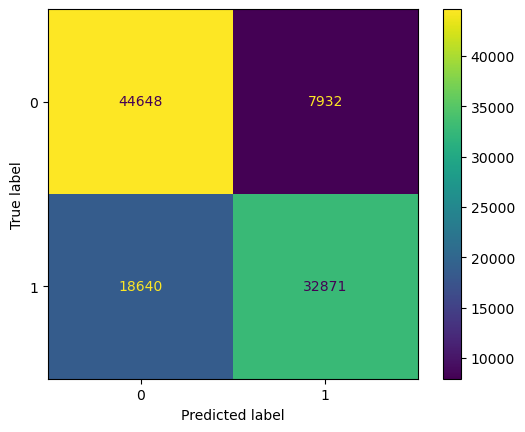

In [48]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = LG.classes_)

# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = LG.classes_)

# Display the confusion matrix
disp.plot()

# Feature selection

In [49]:
## Testing the scores by removing Month - feature as it has a lower rank.

X_best_features =X[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']]
y_best_features = y



## Training and Testing based on best features
X_train_best,X_test_best,y_train_best,y_test_best =train_test_split(X_best_features,y_best_features,test_size=0.20, random_state=46)

LG_best_features = LogisticRegression().fit(X_train_best,y_train_best)

y_best_pred = LG_best_features.predict(X_test_best)

In [50]:
print("Accuracy:", "%.4f" % metrics.accuracy_score(y_test_best, y_best_pred))
print("Precision:", "%.4f" % metrics.precision_score(y_test_best, y_best_pred))
print("Recall:", "%.4f" % metrics.recall_score(y_test_best, y_best_pred))
print("F1 Score:", "%.4f" % metrics.f1_score(y_test_best, y_best_pred))

Accuracy: 0.7447
Precision: 0.8056
Recall: 0.6381
F1 Score: 0.7122


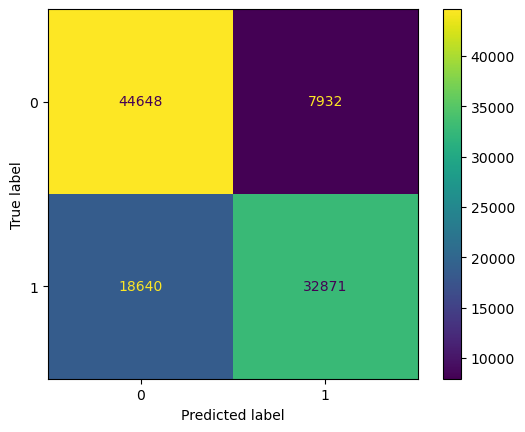

In [51]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test_best, y_best_pred, labels = LG_best_features.classes_)

# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = LG_best_features.classes_)

# Display the confusion matrix
disp.plot()

# 2. Naive Bayes Model
     1. It assumed that the features are independent of each other.
     2. Uses Bayes Theorem to find the probability of y(Result) given (X1,X2,X3,X4,X5)Events have occured.

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
X = dt2[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']]
y = dt2['Corona']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=46)
## Splitting the Training and Testing Data to: 80:20, 20% of the data goes into testing

In [54]:
GNB = GaussianNB().fit(X_train,y_train)

In [55]:
y_pred = GNB.predict(X_test)

In [56]:
accuracy_GNB = metrics.accuracy_score(y_test, y_pred)
precision_GNB = metrics.precision_score(y_test, y_pred)
recall_GNB = metrics.recall_score(y_test, y_pred)
f1_score_GNB = metrics.f1_score(y_test, y_pred)   

print("Accuracy:", "%.4f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.4f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.4f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.4f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.6805
Precision: 0.8911
Recall: 0.4038
F1 Score: 0.5557


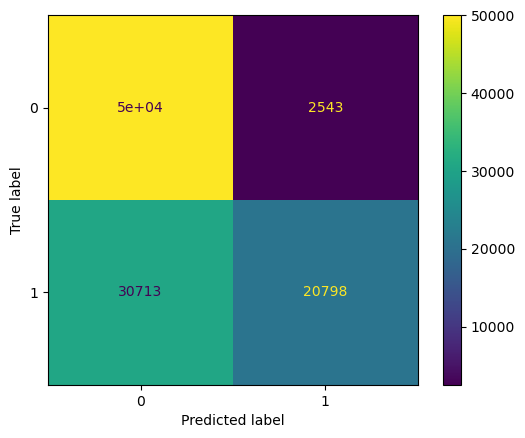

In [57]:
# Calculate values for each quadrant in confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=GNB.classes_)
# Create confusion Matrix as Visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=GNB.classes_)
# Display the Matrix
disp.plot()

# 3. Decision Tree
         Decision Tree can handle Non-linear relationships,both numerical and categorical features and it is interpretable.

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
X = dt2[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']]
y = dt2['Corona']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=46)
## Splitting the Training and Testing Data to: 80:20, 20% of the data goes into testing

In [60]:
from sklearn.tree import plot_tree

In [61]:
DecTree = DecisionTreeClassifier(max_depth = 50,min_samples_leaf=20,random_state = 46) 
                                ## Randomly choosing the depth of the Decision Tree.

DecTree.fit(X_train,y_train)

y_pred = DecTree.predict(X_test)

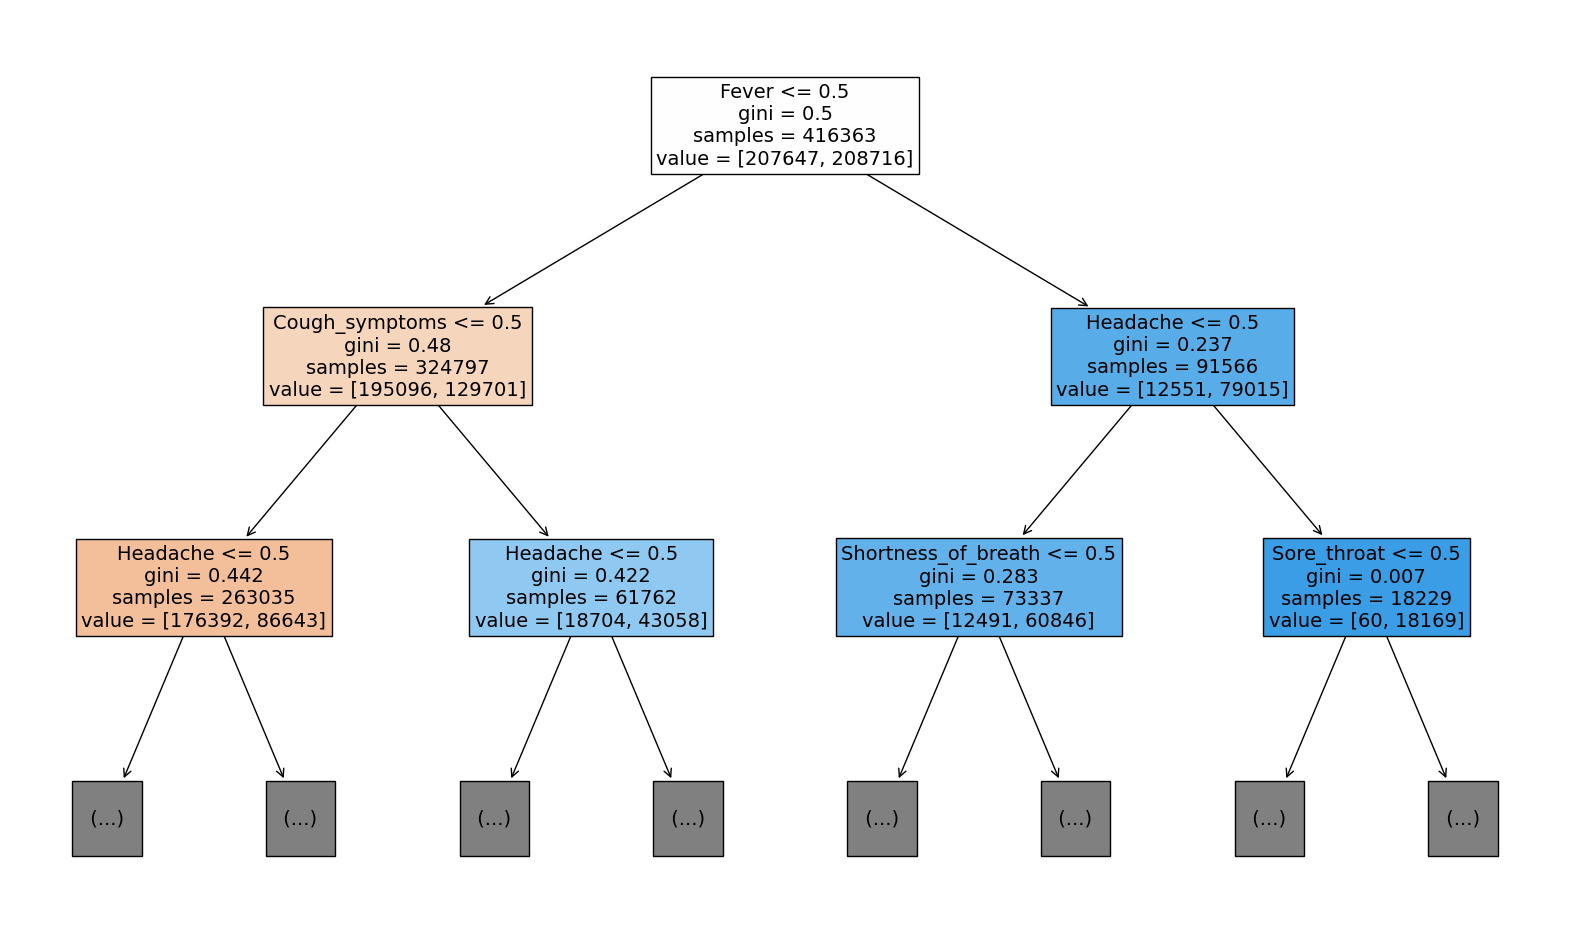

In [62]:
plt.figure(figsize=(20,12))
plot_tree(DecTree, max_depth=2, fontsize=14,filled =True, feature_names=X.columns);

In [63]:
accuracy_Dectree = metrics.accuracy_score(y_test, y_pred)
precision_Dectree = metrics.precision_score(y_test, y_pred)
recall_Dectree = metrics.recall_score(y_test, y_pred)
f1_score_Dectree = metrics.f1_score(y_test, y_pred)   

print("Accuracy:", "%.4f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.4f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.4f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.4f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.7464
Precision: 0.8057
Recall: 0.6424
F1 Score: 0.7148


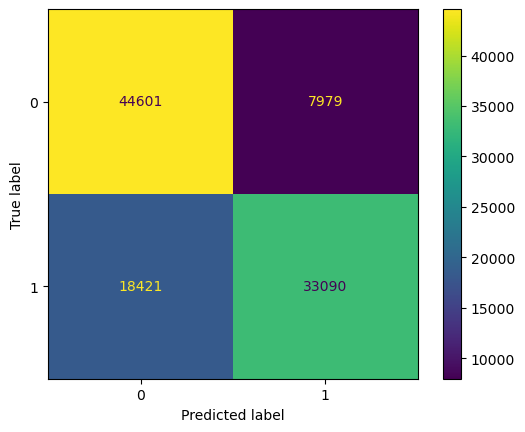

In [64]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = DecTree.classes_)

Disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = DecTree.classes_)
Disp.plot()

# Cross-Validated Hyperparameter Tuning using GridSearchCV

In [65]:
# Assigning a dictionary of hyperparameters to search over
tree_para = {'max_depth':[2,3,5,6,7,8,9,10,15,20,30,40,50],
             'min_samples_leaf': [2,3,5, 10, 20, 50]}

# Assigning a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiating the classifier
tuned_DecTree = DecisionTreeClassifier(random_state = 46)



In [ ]:
# Instantiate the GridSearch
clf = GridSearchCV(tuned_DecTree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5,        ## Cross - Validation folds
                   
                   refit="f1")  ## refit-> The reason it's called refit is because once the algorithm finds 
                                ## the combination of hyperparameters that results in the best average score 
                                ## across all validation folds,
                                ## it will then refit this model to all of the training data

# Fit the model
clf.fit(X_train, y_train)

In [ ]:
clf.best_estimator_   ## Best parameters for best results

In [ ]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

# Best average F1 score during validation

In [ ]:
clf.cv_results_

In [ ]:
print("Validation model Accuracy:","%.4f" % clf.cv_results_['mean_test_accuracy'].max())
print("Validation model Precision:","%.4f" % clf.cv_results_['mean_test_precision'].max())
print("Validation model Recall:","%.4f" %  clf.cv_results_['mean_test_recall'].max())
print("Validation model F1 Score:","%.4f" % clf.cv_results_['mean_test_f1'].max())

## These results are from Validation

In [ ]:
TunedDecTree = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=2, random_state = 46) 
                                ## choosing the depth of the Decision Tree from Hyperparameter Tuning

TunedDecTree.fit(X_train,y_train)

y_pred = TunedDecTree.predict(X_test)

In [ ]:
print("Accuracy:", "%.4f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.4f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.4f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.4f" % metrics.f1_score(y_test, y_pred))

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = TunedDecTree.classes_)

Disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = TunedDecTree.classes_)
Disp.plot()

Note: Decision trees are particularly sensitive to the complexity of the data. Since the dataset is not very complex, tuning it does not give any significant results.


# 4. Random Forest
           Ensemble of decision trees, reduces overfitting, robust, handles complex relationships.

In [ ]:
X = dt2[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']]
y = dt2['Corona']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=46)
## Splitting the Training and Testing Data to: 80:20, 20% of the data goes into testing

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(max_depth =5,min_samples_leaf=2, random_state = 46).fit(X_train,y_train)

In [ ]:
y_pred = RF.predict(X_test)

In [ ]:
accuracy_RF = metrics.accuracy_score(y_test, y_pred)
precision_RF = metrics.precision_score(y_test, y_pred)
recall_RF= metrics.recall_score(y_test, y_pred)
f1_score_RF = metrics.f1_score(y_test, y_pred)   

print("Accuracy:", "%.4f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.4f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.4f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.4f" % metrics.f1_score(y_test, y_pred))

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = RF.classes_)

Disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = RF.classes_)
Disp.plot()

In [ ]:
feature_importances = pd.DataFrame({"Features":X.columns, "Importance":RF.feature_importances_})
feature_importances

# Important features:
1. Fever
2. Cough_symptoms
3. Headache
4. Sore_throat

# 5. XG Boost

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance


In [ ]:
X = dt2[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']]
y = dt2['Corona']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=46)
## Splitting the Training and Testing Data to: 80:20, 20% of the data goes into testing

In [ ]:
xg = XGBClassifier().fit(X_train,y_train)

In [ ]:
y_pred = xg.predict(X_test)

In [ ]:
accuracy_xg = metrics.accuracy_score(y_test, y_pred)
precision_xg = metrics.precision_score(y_test, y_pred)
recall_xg= metrics.recall_score(y_test, y_pred)
f1_score_xg = metrics.f1_score(y_test, y_pred)   

print("Accuracy:", "%.4f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.4f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.4f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.4f" % metrics.f1_score(y_test, y_pred))

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = xg.classes_)

Disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xg.classes_)
Disp.plot()

# Results 

In [ ]:
table = pd.DataFrame()
table = table.append({'Model': "Logistic Model",
                       'Accuracy': accuracy_LG,
                       'Precision': precision_LG,
                       'Recall': recall_LG,
                       'F1 Score': f1_score_LG
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Naive Bayes",
                        'Accuracy':  accuracy_GNB,
                        'Precision': precision_GNB,
                        'Recall': recall_GNB,
                        'F1 Score': f1_score_GNB
                      
                      },
                        ignore_index=True
                    )
table = table.append({'Model': "Decision Tree",
                        'Accuracy':  accuracy_Dectree,
                        'Precision': precision_Dectree,
                        'Recall': recall_Dectree,
                        'F1 Score': f1_score_Dectree
                       },
                        ignore_index=True)

table = table.append({'Model': "Random Forest",
                        'Accuracy':  accuracy_RF,
                        'Precision': precision_RF,
                        'Recall': recall_RF,
                        'F1 Score': f1_score_RF
                       },
                        ignore_index=True)

table = table.append({'Model': "XG Boost",
                        'Accuracy':  accuracy_xg,
                        'Precision': precision_xg,
                        'Recall': recall_xg,
                        'F1 Score': f1_score_xg
                       },
                        ignore_index=True)

table

In [ ]:
import plotly.express as px
model_comparison_melted = pd.melt(table, id_vars='Model', var_name='Metric', value_name='Score')

# Grouped bar chart using Plotly Express
fig = px.bar(model_comparison_melted, x='Model', y='Score', color='Metric', barmode='group',
             labels={'Score': 'Performance Score'})

# Customize layout
fig.update_layout(title='Model Comparison',
                  xaxis_title='Model',
                  yaxis_title='Performance Score',
                  legend_title='Metric')


fig.show()

Taking F1 score as the main evaluation metric as, F1 score is the Harmonic mean of Recall and Precision.

1. We need to reduce the False-Negatives. If a Patient is Actually positive, but the model predicts it to be negative, it could be disastrous to the patient and could mean life and death. 

2. We need to Reduce False-Positives. It could hepl significantly in patient treatment when the model accurately predicts the True-Positives and reduce the work load on the workforce in hospitals, because they need not spend resources on patients who are not likely to be Covid-positive. This will reduce the burden on health-care.

3. Other than Naive-Bayes model, all other 4 models can be implemented. Naive-Bayes is the worst performer possibly because it assumes that all the features are independent of each other. Which is actually not the case.

4. With Recursive Feature Elimination and feature_importances we were able to see the features were relevant to the model and aided in model predictions.

5. 5 Models were prepared which could help in the efficient treatment of covid patients.

6. Additionally, the data for Gender, Age of the person and the Travel history are some of the parameters that can be improved upon, for better screening of Corona-positive patients.


# SQL

In [ ]:
! pip install duckdb


In [ ]:
import duckdb
conn = duckdb.connect()


In [ ]:
# For SQL commands
conn.register('dt',dt)

In [ ]:
conn.execute("select * from dt").fetchdf()

# Questions:

1. Find the number of corona patients who faced shortness of breath.

2. Find the number of negative corona patients who have fever and sore_throat. 

3. Group the data by month and rank the number of positive cases.

4. Find the female negative corona patients who faced cough and headache.

5. How many elderly corona patients have faced breathing problems?

6. Which three symptoms were more common among COVID positive patients?

7. Which symptom was less common among COVID negative people?

8. What are the most common symptoms among COVID positive males whose known contact was abroad? 

In [ ]:
# 1. Find the number of corona patients who faced shortness of breath.
conn.execute("SELECT COUNT(*) as Patients_with_shortness_of_breath FROM dt WHERE Shortness_of_breath=='TRUE'").fetchdf()

In [ ]:
# 2. Find the number of negative corona patients who have fever and sore_throat.
conn.execute("SELECT COUNT() as Negative_patients FROM dt WHERE Fever == 'TRUE' and Sore_throat == 'TRUE' and Corona = 'NEGATIVE' ").fetchdf()

In [ ]:
# 3. Group the data by month and rank the number of positive cases.
conn.execute("SELECT COUNT(*) as Positive_cases, Month, RANK() OVER(order by COUNT(*) DESC) as Rank \n"
"FROM dt WHERE Corona = 'POSITIVE' \n"
"GROUP BY Month \n"
"ORDER BY Positive_cases DESC \n").fetchdf()

In [ ]:
# 4. Find the female negative corona patients who faced cough and headache.
conn.execute(" SELECT COUNT(*) as Female_Negative \n"
            " FROM dt \n"
            " WHERE Corona =='NEGATIVE' and Cough_symptoms =='TRUE' and Headache == 'TRUE'").fetchdf()

In [ ]:
# 5. How many elderly corona patients have faced breathing problems?
conn.execute(" SELECT COUNT(*) as Elderly_breathing_issues \n"
             " FROM dt \n "
             " WHERE Age_60_above == 'TRUE' and Shortness_of_breath == 'TRUE'  \n ").fetchdf()

In [ ]:
# 6. Which three symptoms were more common among COVID positive patients?
conn.execute("""
    SELECT
        SUM(CASE WHEN Cough_symptoms = 'TRUE' THEN 1 ELSE 0 END) as Cough_count,
        SUM(CASE WHEN Fever = 'TRUE' THEN 1 ELSE 0 END) as Fever_count,
        SUM(CASE WHEN Sore_throat = 'TRUE' THEN 1 ELSE 0 END) as Sore_throat_count,
        SUM(CASE WHEN Shortness_of_breath = 'TRUE' THEN 1 ELSE 0 END) as Shortness_of_breath_count,
        SUM(CASE WHEN Headache = 'TRUE' THEN 1 ELSE 0 END) as Headache_count
    FROM dt
    WHERE Corona = 'POSITIVE';
""").fetchdf()

In [ ]:
# 7. Which symptom was less common among COVID negative people?
conn.execute("""
    SELECT
        SUM(CASE WHEN Cough_symptoms = 'TRUE' THEN 1 ELSE 0 END) as Cough_count,
        SUM(CASE WHEN Fever = 'TRUE' THEN 1 ELSE 0 END) as Fever_count,
        SUM(CASE WHEN Sore_throat = 'TRUE' THEN 1 ELSE 0 END) as Sore_throat_count,
        SUM(CASE WHEN Shortness_of_breath = 'TRUE' THEN 1 ELSE 0 END) as Shortness_of_breath_count,
        SUM(CASE WHEN Headache = 'TRUE' THEN 1 ELSE 0 END) as Headache_count
    FROM dt
    WHERE Corona = 'NEGATIVE';
""").fetchdf()


In [ ]:
# 8. What are the most common symptoms among COVID positive males whose known contact was abroad?
conn.execute("""
    SELECT
        SUM(CASE WHEN Cough_symptoms = 'TRUE' THEN 1 ELSE 0 END) as Cough_count,
        SUM(CASE WHEN Fever = 'TRUE' THEN 1 ELSE 0 END) as Fever_count,
        SUM(CASE WHEN Sore_throat = 'TRUE' THEN 1 ELSE 0 END) as Sore_throat_count,
        SUM(CASE WHEN Shortness_of_breath = 'TRUE' THEN 1 ELSE 0 END) as Shortness_of_breath_count,
        SUM(CASE WHEN Headache = 'TRUE' THEN 1 ELSE 0 END) as Headache_count
    FROM dt
    WHERE Corona == 'POSITIVE' and Sex == 'MALE' and Known_contact == 'ABROAD';
""").fetchdf()